# **Synthetic Learning Behavior Analysis: Extract**

## Objectives

* By the end of the extraction phase, I will:
    1. Import the dataset from Kaggle.
    2. Check the data for missing and null values, and duplicates.
    3. Define a data dictionary.
    4. Analyze summary statistics.
    5. Analyze correlation.
    6. Explore further through visualizations.
    7. State assumptions.
    8. Summarize findings.


## Inputs

* [Task outline](https://code-institute-org.github.io/5P-Assessments-Handbook/da-ai-bootcamp-capstone-prelims.html)
* [Kaggle dataset](https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset/data)
* Libraries from the requirements.txt file 


## Outputs

* Overview of the dataset, its features, and how they are interacting.
* Basic visaulizations that complement the overview.
* Summary of the findings and an overview of the next step. 

## Disclaimer

* This dataset is synthetically created, as called out by the owner in Kaggle. The observations I find here may reflect real-world behavior to some degree. However, I will not use the dataset to draw causal inferences. Having said that, I will analyze data and develop exploratory models that will serve as placeholders for similar real-world applications.



---

# Import key libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mshin\\vs-code-projects\\synthetic_learning_behavior_analysis\\project_work_jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mshin\\vs-code-projects\\synthetic_learning_behavior_analysis'

# Data import

Manually downloaded the source data file from [Kaggle](https://www.kaggle.com/datasets/adilshamim8/personalized-learning-and-adaptive-education-dataset/data), saved it locally (within data > source data), and importing it onto VSCode.

In [26]:
df = pd.read_csv("data/source_data/personalized_learning_dataset.csv")
print(df.shape)
df.head(10)

(10000, 15)


,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No
5,S00006,34,Male,Undergraduate,Web Development,184,1,87,34,70,Medium,43,Visual,4,No
6,S00007,45,Male,High School,Cybersecurity,454,3,69,46,83,Low,37,Kinesthetic,5,No
7,S00008,47,Male,High School,Cybersecurity,425,2,62,23,52,High,35,Reading/Writing,5,No
8,S00009,48,Male,Undergraduate,Cybersecurity,359,1,59,10,88,Medium,49,Reading/Writing,2,No
9,S00010,45,Female,Undergraduate,Data Science,263,4,63,30,99,Low,61,Auditory,3,No


This dataset contains **10,000 rows** (or instances) and **15 columns** (or features). 

**Disclaimer:** After going through the Provenance section in Kaggle, I understand that this dataset is synthetically generated. While it is based on real-world observations, I am aware that it is not the ground truth. I will ensure that my observations, claims, or inferences are framed carefully.

In [29]:
df.info()#Reviewing the data types to understand the data better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

This dataset contains learner behaviors in a Learning Management System. It contains a good mix of numerical data (time_spent_on_video, Quiz_Scores, and others), descriptive data (Course_Name and Learning_Style), and categorical data (Engagement_Level and Dropout_Likelihood).

In [11]:
df.isnull().sum() #Checking missing or null values in the dataset.

Student_ID                    0
Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

There are no missing values or nan values. Considering it is an engineered dataset, this is not surprising.

In [25]:
(df == 0).sum() #Checking for zero values in the dataset as this can cause a problem during statistical analysis.

Student_ID                      0
Age                             0
Gender                          0
Education_Level                 0
Course_Name                     0
Time_Spent_on_Videos            0
Quiz_Attempts                   0
Quiz_Scores                     0
Forum_Participation           204
Assignment_Completion_Rate      0
Engagement_Level                0
Final_Exam_Score                0
Learning_Style                  0
Feedback_Score                  0
Dropout_Likelihood              0
dtype: int64

There are **204** zero-value entries under **Forum_Participation**. Additionally, the zero-value entries are limited to this feature alone. Considering this a huge dataset with 10, 000 entries, having 204 learners not interacting on a forum is quite real-world. I am assuming that these are valid and not errors.

**Assumption:** The zero-value entries within Forum_Participation are valid and true entries. 

In [22]:
df_duplicate = df[df.duplicated()] #Checking for duplicated values in the dataset.
df_duplicate

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood


An empty dataframe indicates that there are no duplicate values. I want to confirm this.

In [24]:
df.duplicated().sum() #Rechecking to confirm that there are indeed no duplicates.

0

There are no duplicates. The author has created quite a smooth dataset. The challenge lies in how to analyze the data. 

---

# Data dictionary

Here are the different features (columns) along with their meaning. This helps with reviewing and understanding the data better.

## Dictionary

|Feature| Explanation|
|------------------------------|-----------------------------------------------------------------------------| 
|Student_ID| Unique identifier for each learner|
|Age| Age of the learners|
|Gender| Gender of the learners|
|Education_Level| The level of schooling|
|Course_Name| Learners' choice of digital training session|
|Time_Spent_on_Videos| The number of minutes learners spend on reviewing videos|
|Quiz_Attempts| The number of trials on a quiz|
|Quiz_Scores| The measurable outcome of a quiz (measured in percentage)|
|Forum_Participation| The number of times learners participated in a discussion forum|
|Assignment_Completion_Rate| The percentage of assignments completed|
|Engagement_Level| The level of learner engagement (based on activity metrics)|
|Final_Exam_Score| The measurable outcome of the learning session (measured in percentage)|
|Learning_Style| Preferred method of learning|
|Feedback_Score| Measure of learners' rating for the course (measured upon 5)|
|Dropout_Likelihood| Probability of a learner dropping out of the course|

										

**Source credit:** Utilized the basic explanation found in Kaggle and edited it further based on my industry experience. I used Kaggle to come up with certain contextual information (such as how time spent on videos is measured, how quiz scores are measured, and so on).

---

# Assumptions

1. Zero-value entries in the Forum_Participation column are valid.

2. Engagement_Level includes user activities such as:

    a. quiz activities(number of attempts, answers provided)

    b. assignment activities (how many assignments learners complete)

    c. the way learners leverage collateral educational resources (such as downloadable links, additional reading materials)

    d. interactivity data collated through xAPI

    e. forum participation

    f. questions asked or issues flagged (through the LMS or discussion forum)

3. Learning_Style is observed rather than self-assessed.

---

# Business requirements

As a digital learning service provider, here are the key problems the data should help me resolve.

1. As a digital learning service provider, we want to group learners and enable adaptive learning experiences, so that we engage better with the existing users. 
    
    1.1. Meaningful clusters exist within the dataset

2. As a program manager, I want to be able to predict dropout probability, so that we can engage with high-risk users. 
    
    2.1. Learning Style impacts dropout likelihood

3. As an instructional design manager, I want to understand what factors impact engagement levels so that I can drive my team to design user-friendly learning experiences. 
    
    3.1. Time spent on videos is associated with engagement level

4. As an instructional design manager, I want to analyze how learners choice of course and learning styles impact engagement level, so that we can adapt learning experiences. 
    
    4.1. Course choice impacts feedback and engagement level

---

# Data exploration

Exploring how data is distributed and how different features (columns) are interacting with one another.

In [31]:
df.describe(include = "all") #Checking the summary statistict to understand how the data is distributed.

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
count,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,10000
unique,10000,NaN,3,3,5,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,2
top,S00001,NaN,Female,Undergraduate,Machine Learning,NaN,NaN,NaN,NaN,NaN,Medium,NaN,Reading/Writing,NaN,No
freq,1,NaN,4886,5070,2043,NaN,NaN,NaN,NaN,NaN,4927,NaN,2554,NaN,8043
mean,NaN,32.137700,NaN,NaN,NaN,255.375400,2.500500,64.578600,24.616200,69.546800,NaN,64.697000,NaN,3.012600,NaN
std,NaN,10.062647,NaN,NaN,NaN,141.656392,1.122642,20.289125,14.330305,17.360782,NaN,20.096417,NaN,1.421423,NaN
min,NaN,15.000000,NaN,NaN,NaN,10.000000,1.000000,30.000000,0.000000,40.000000,NaN,30.000000,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,131.000000,1.000000,47.000000,12.000000,54.000000,NaN,47.000000,NaN,2.000000,NaN
50%,NaN,32.000000,NaN,NaN,NaN,257.000000,3.000000,65.000000,25.000000,69.000000,NaN,65.000000,NaN,3.000000,NaN
75%,NaN,41.000000,NaN,NaN,NaN,378.000000,4.000000,82.000000,37.000000,85.000000,NaN,82.000000,NaN,4.000000,NaN


The above summary statistics reveals the following:

1. Learners are aged between 15 - 49.

2. The dataset contains samples from three genders. Female samples are the highest.

3. The average number of minutes learners spend on videos is 255.37. The mean provides the average.

4. Forum_Participation indicates that some learners are not participating in the forum.

5. The minimum assignment completion rate is 40 percent.

6. A little less than 50 percent (49.27 %) show medium engagement level. 

7. The average final assessment score of 64.69 percent likely indicates healthy completion rates within the synthetic dataset. The standard deviation, which indicates how much assessment scores vary, is 20. This means that learners could score 20 percentage points above or below 64.69.

8. The dropout likelihood score, with 80.43% "No" values, indicates that learners are less likely to drop out of courses. 

I want to take a deeper look at the unique values and counts of each column for better visibility.

In [ ]:
df_uniq = {} #Creating a placeholder dictionary to store unique values and counts for each column.
for col in df.columns:
    df_uniq[col] = {
        "Unique count": df[col].nunique(),
        "Unique values": df[col].unique()
    }
df_uniq_df = pd.DataFrame.from_dict(df_uniq, orient = "index")#Creating a DataFrame from the dictionary for better visualization.
df_uniq_df

,Unique count,Unique values
Student_ID,10000,"[S00001, S00002, S00003, S00004, S00005, S0000..."
Age,35,"[15, 49, 20, 37, 34, 45, 47, 48, 29, 35, 16, 4..."
Gender,3,"[Female, Male, Other]"
Education_Level,3,"[High School, Undergraduate, Postgraduate]"
Course_Name,5,"[Machine Learning, Python Basics, Data Science..."
Time_Spent_on_Videos,490,"[171, 156, 217, 489, 496, 184, 454, 425, 359, ..."
Quiz_Attempts,4,"[4, 2, 1, 3]"
Quiz_Scores,70,"[67, 64, 55, 65, 59, 87, 69, 62, 63, 80, 77, 9..."
Forum_Participation,50,"[2, 0, 43, 34, 46, 23, 10, 30, 42, 36, 4, 31, ..."
Assignment_Completion_Rate,60,"[89, 94, 67, 60, 88, 70, 83, 52, 99, 85, 58, 5..."


**Code credit:** Iterated with ChatGPT to get the code for the above section.  

I would like to examine how the data is distributed so that I can prepare for statistical tests.

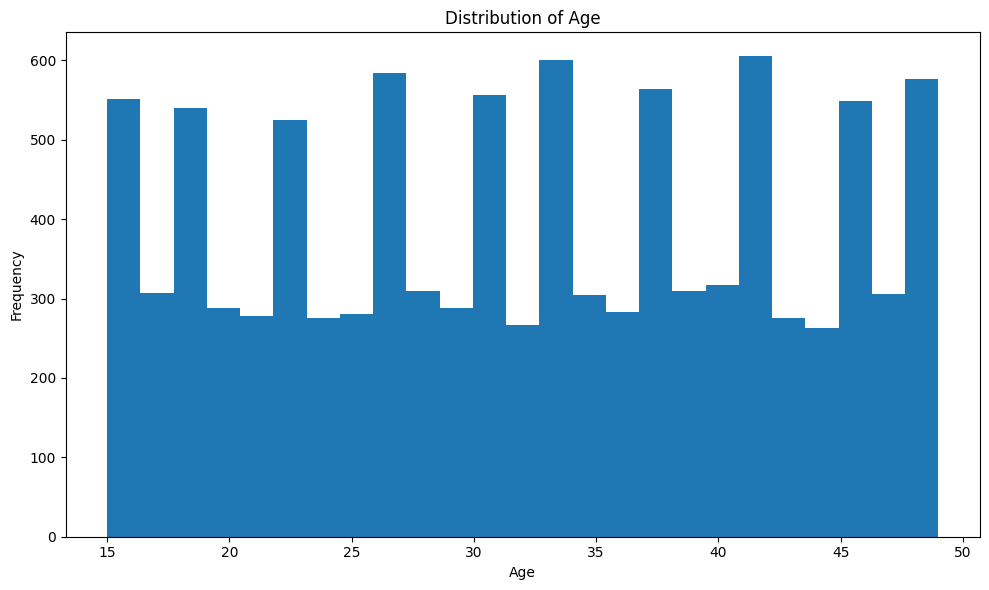

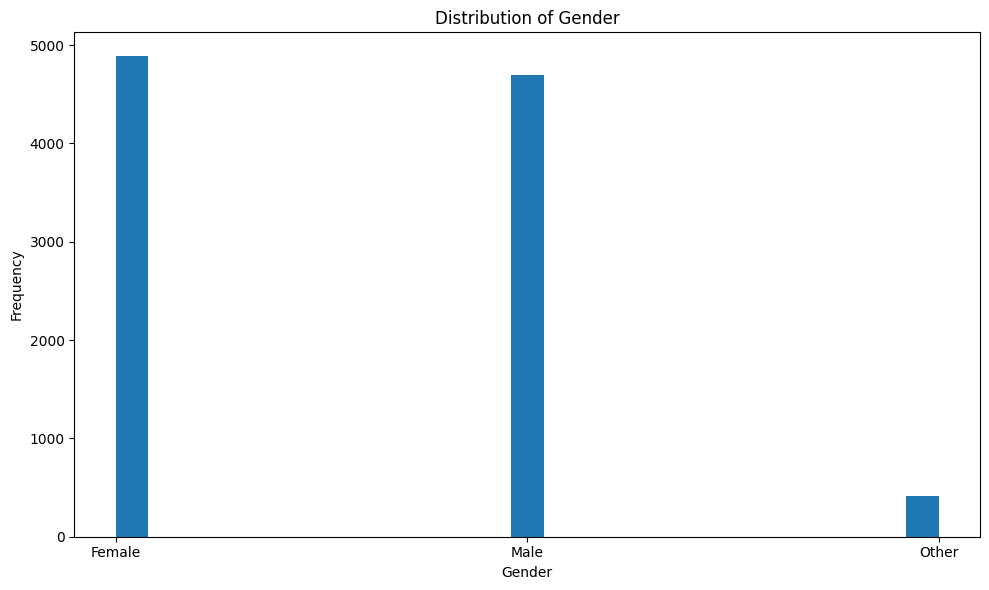

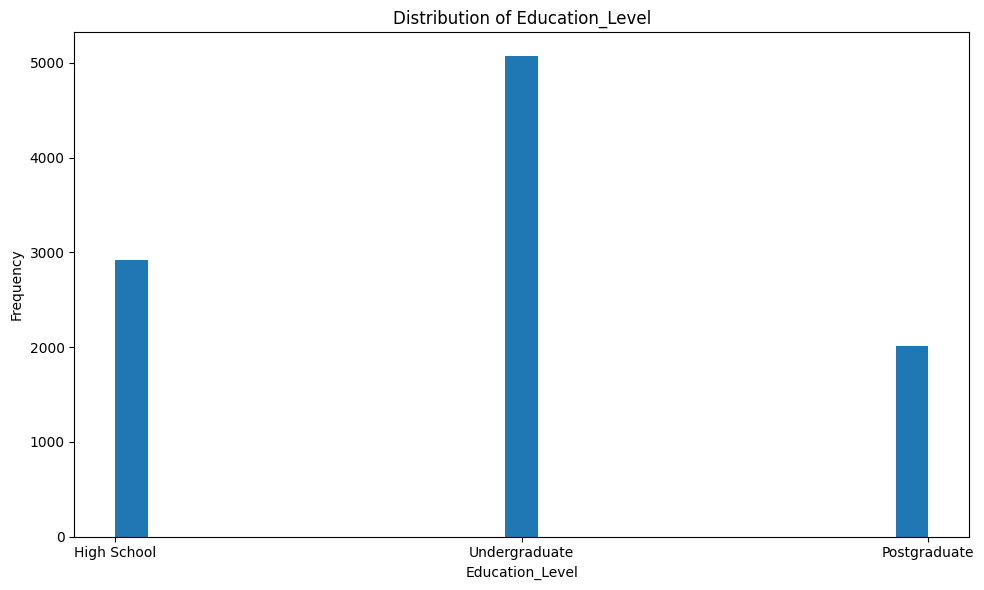

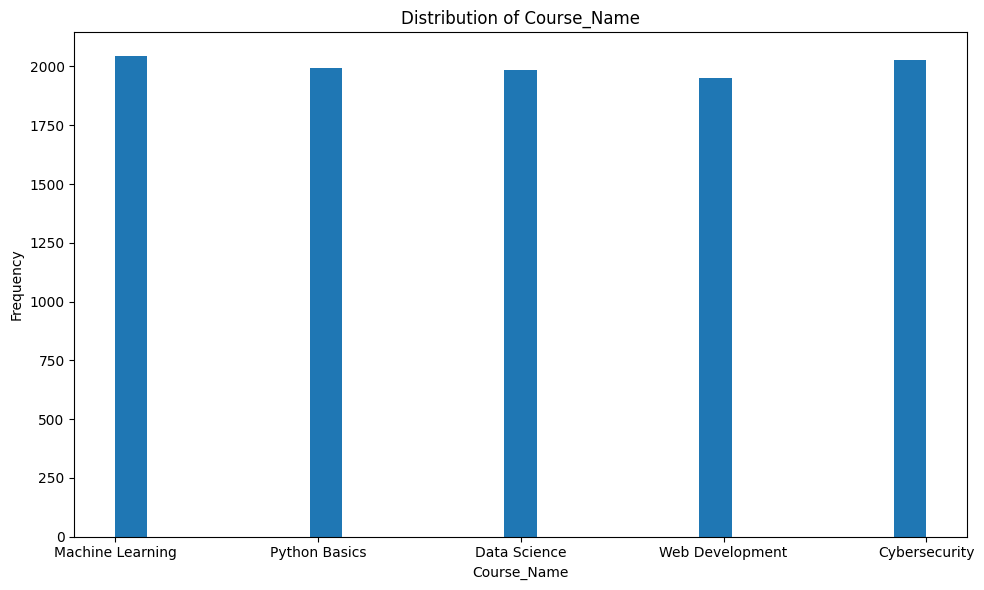

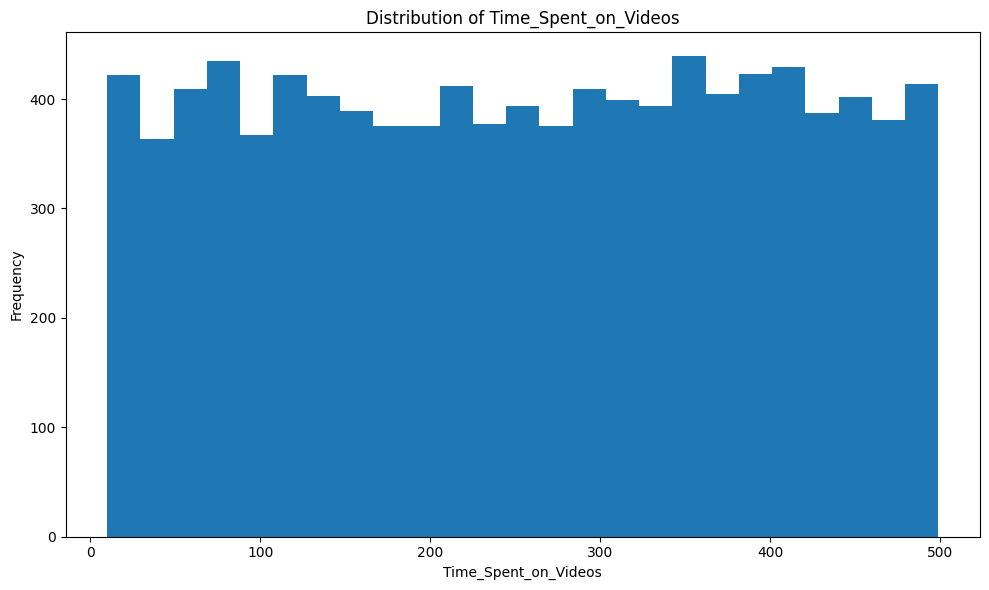

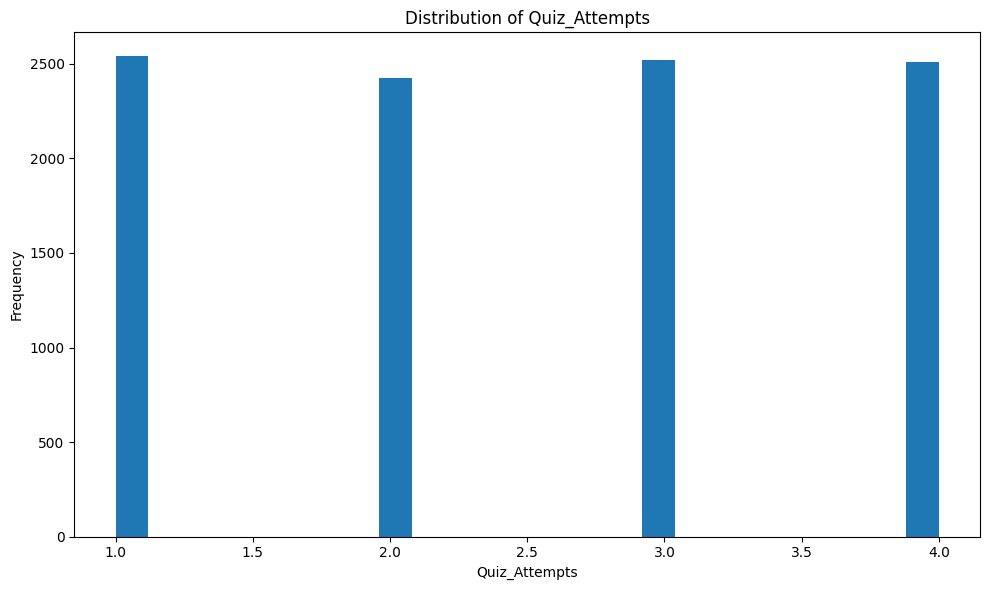

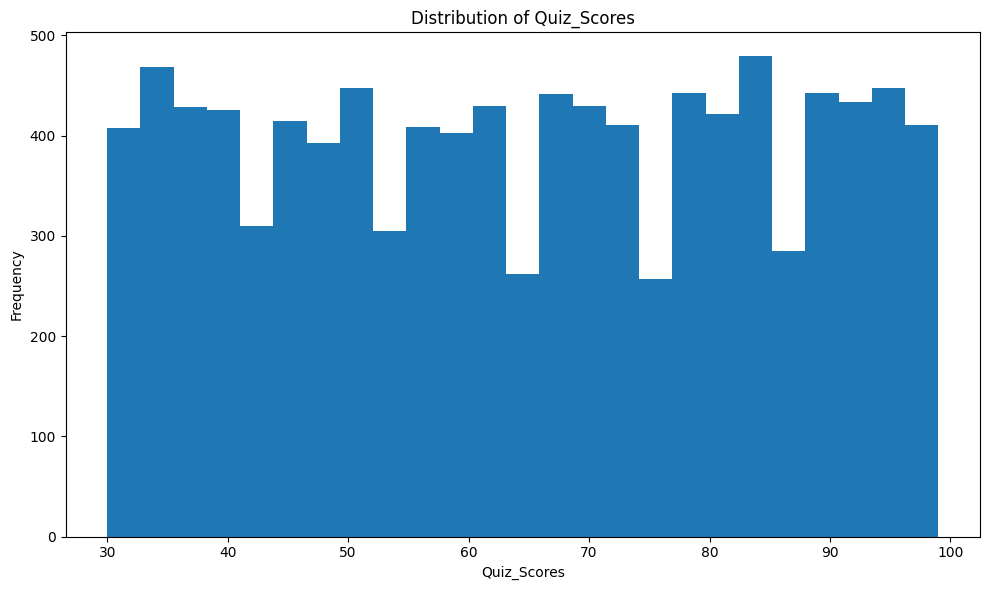

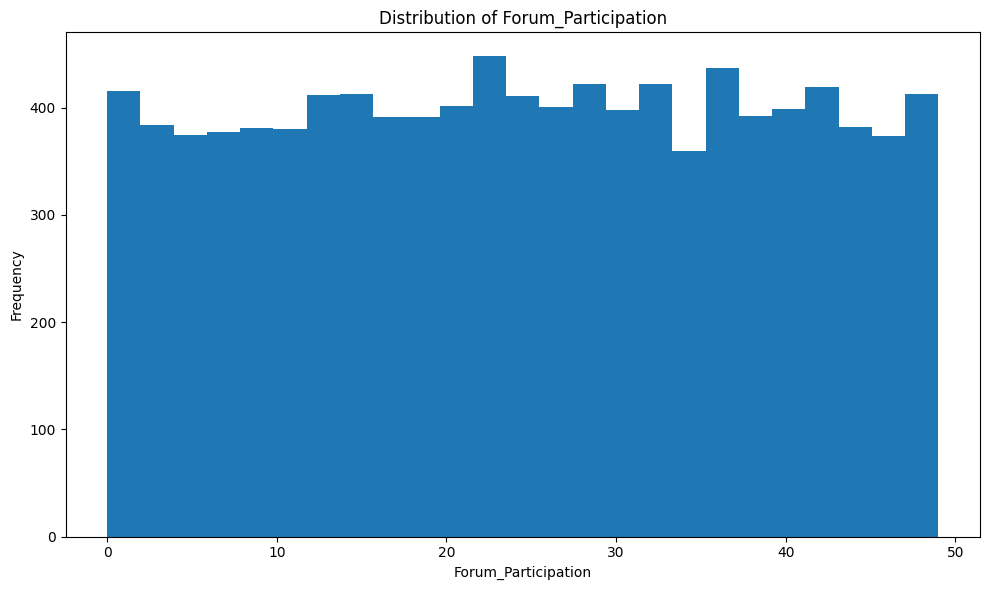

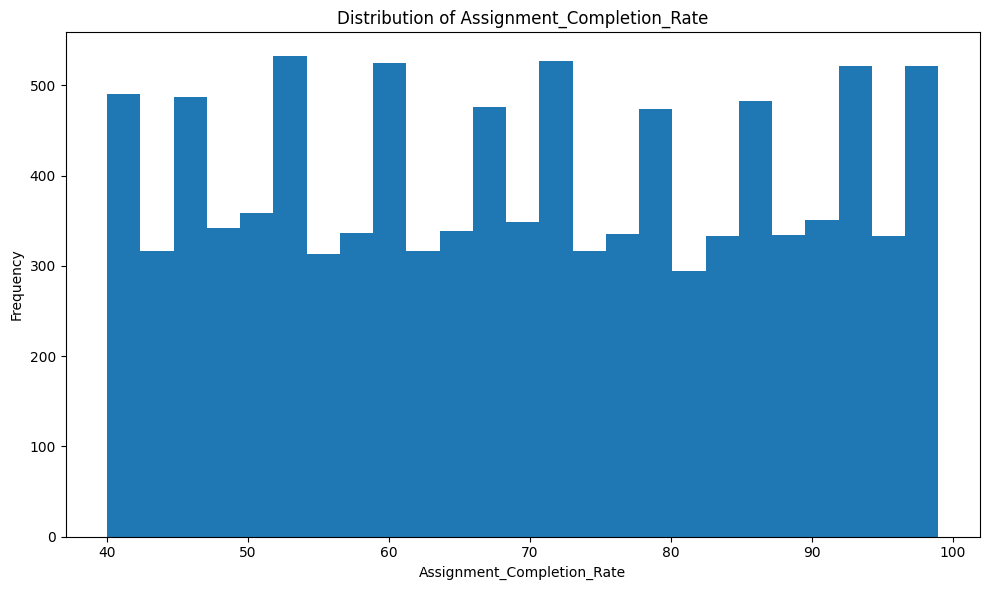

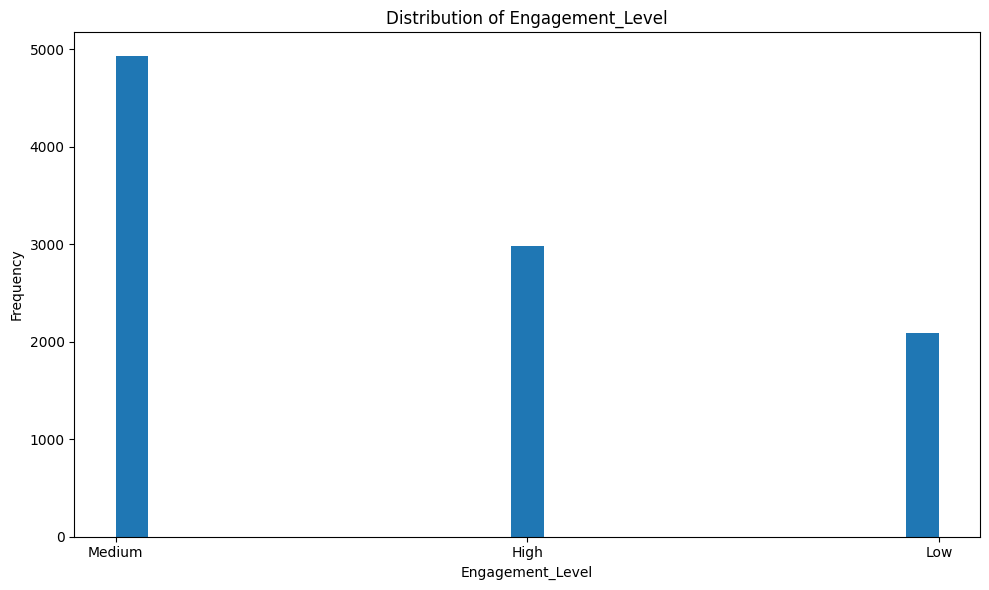

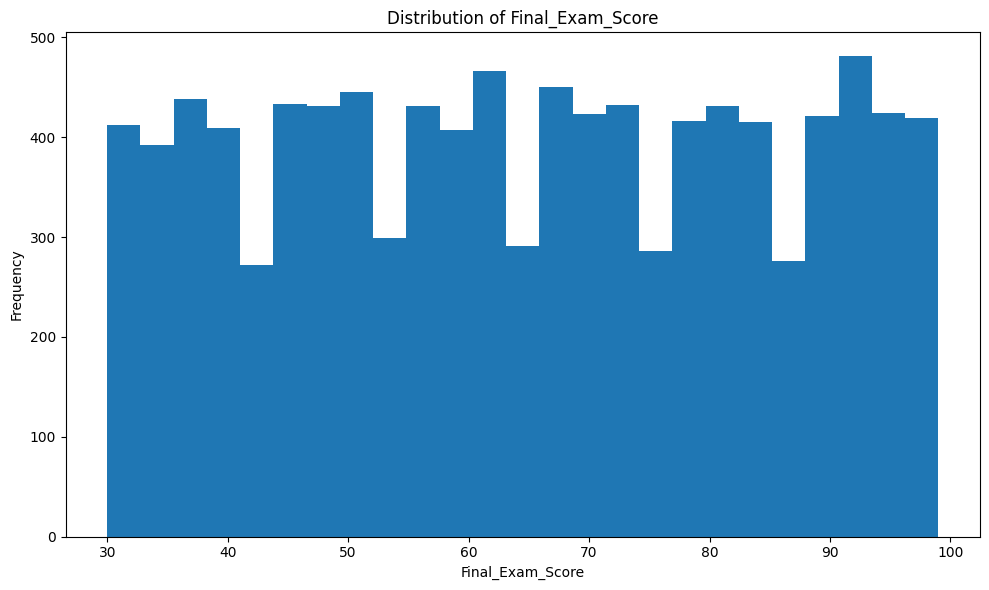

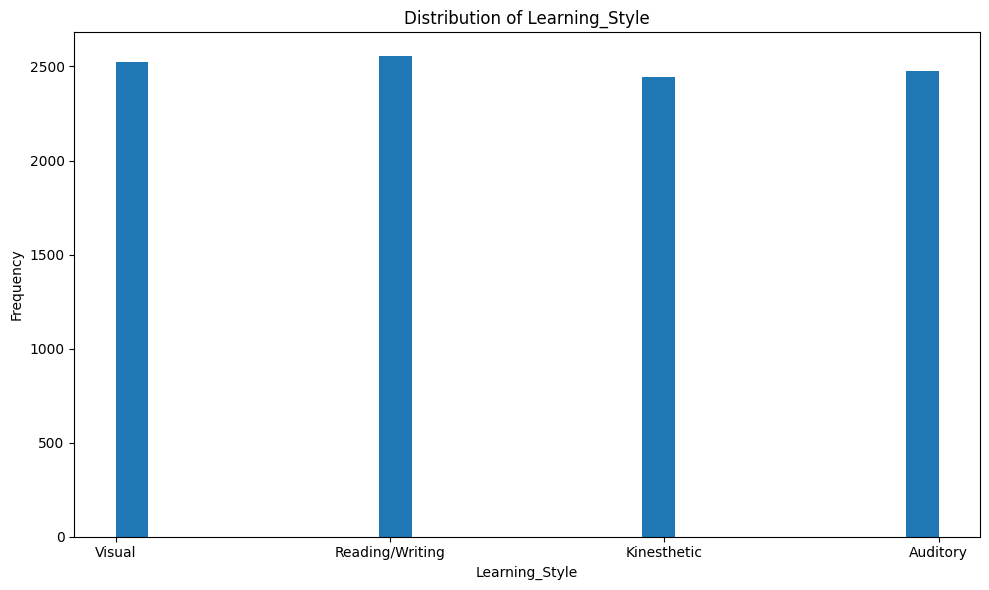

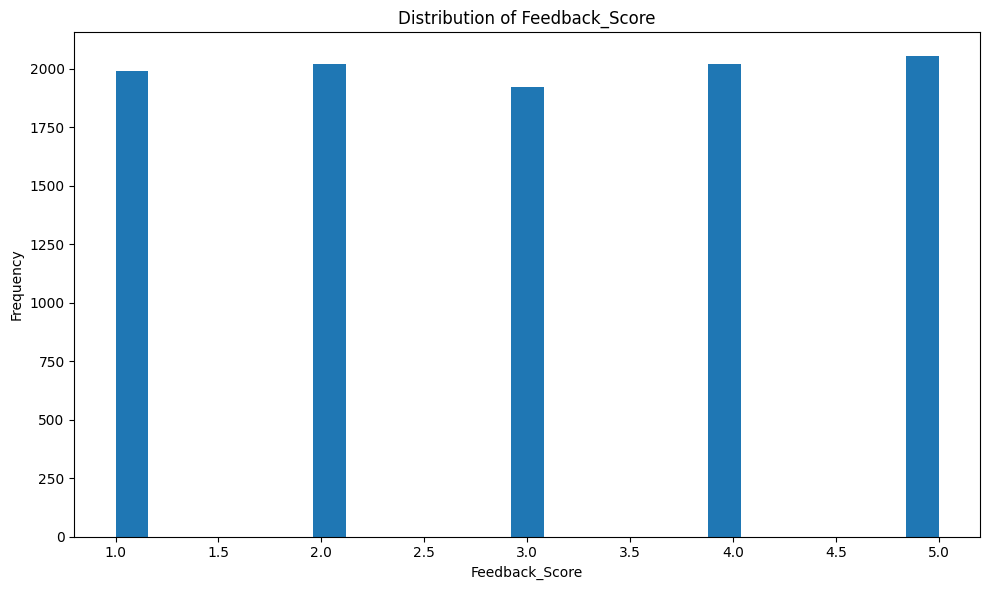

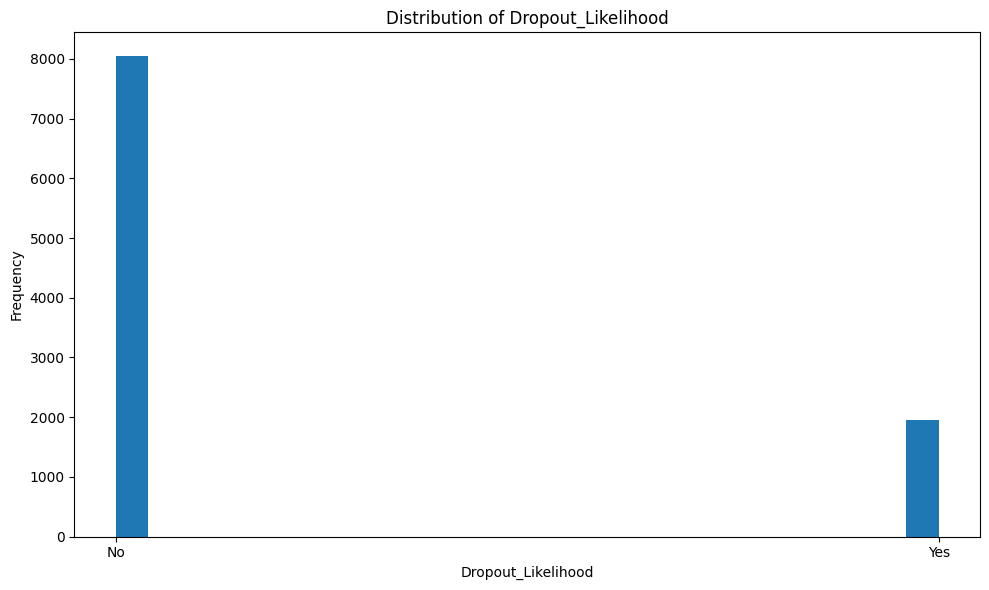

In [72]:
for col in df.columns[1:]:
    plt.figure(figsize = (10, 6))
    plt.hist(data = df, x = col, bins = 25, label = col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

Although the dataset is engineered, the graphs above show that the data is not normally distributed for any of the features. For instance, consider the age distribution chart. Usually, you would expect a partiuclar age group to be significantly high, say 21 - 38. The age groups below 21 and above 38 would progressively reduce. This creates a bell-shaped-curve called Gaussian distribution.

However, in the synthetic learning behavior analysis dataset, there are spikes and dips between different age groups and the distribution is uniform. 

I am checking how the data is distributed as it will help me determine which statistical tests I need to use.

<Axes: >

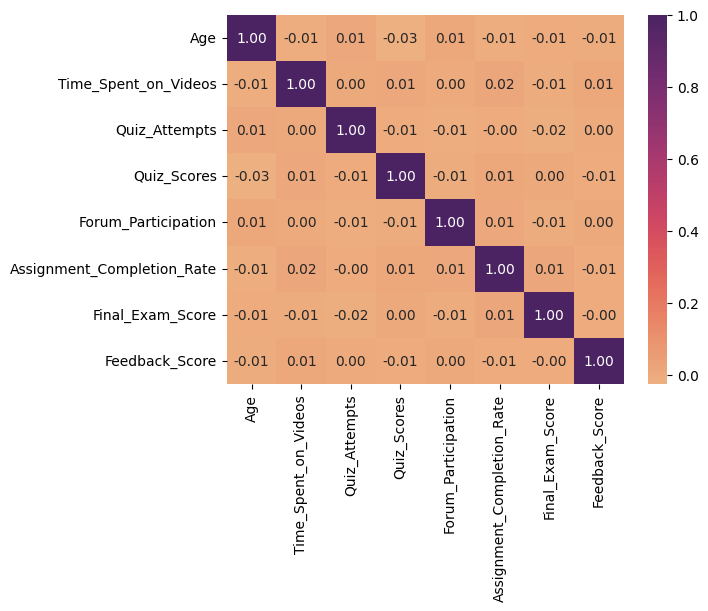

In [77]:
sns.heatmap(df.select_dtypes(include = "number").corr(), annot = True, cmap = "flare", fmt = ".2f") #Visualizing the correlation matrix to understand relationships between numerical features.

A correlation analysis explains if any of the numerical features (such as Time_Spent_on_Videos and Final_Exam_Score) are related. Sometimes, certain behaviors and outcomes are positively correleated (indicated with a score between 0.8 and 1). That means any change in the behvaior (increase/decrease) will increase or decrease the likelihood of the outcome. For instance, if the bill increased and the waiter too received a larger tip, then the behavior (increase bill) is positively correlated to the outcome (tip).

In the synthetic dataset, there are no obvious correlations that exist. There are no negative correlations either.

A negative correleation is when a behaviour's movement iversely impacts the outcome. For instance, if the bill increases and tip decreased then bill and tip are negatively correlated.

I must also note that correlation =! causal relationship. Sometimes, there are non-linear correlations which will have to be dug out. I will get to this during the Transformation phase of the project.

---